In [1]:
#importing libraries
import random
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [2]:
#swarm initializer
# This function initializes the swarm given the number of particles
def init_swarm(n):
"""This function intializes a swarm given the value of number of particles n"""
    #having swarm as a dictionary
    swarm = {}
    #creating a list to hold all particles
    swarm['particles'] = []
    
    for i in range(n):
        #x1,x2 and v1,v2 are positions and velocities for variable 1 and 2
        particle = {}
        particle['x1'] = random.random()*255
        particle['x2'] = random.random()*255
        
        particle['v1'] = -255 +(random.random()*255*2)
        particle['v2'] = -255 +(random.random()*255*2)
        
        # initializing local best value to worse than worst possible solution
        particle['l_best_val'] = 2000
        particle['l_best_x1'] = particle['x1']
        particle['l_best_x2'] = particle['x2']
        
        #appending the particle to list of particles
        swarm['particles'].append(particle)
    
    # initializing global best value to worse than worst possible solution
    swarm['g_best_val'] = 2000
    
    # this really does not matter as would be evaluated once bef
    swarm['g_best_x1']  = particle['x1']
    swarm['g_best_x2']  = particle['x2']

    return swarm

In [19]:
def evaluate_fitness(swarm):
    """This function evaluates the fitness of a swarm
    and updates the local best solution for each particle
    along with updating the global best solution"""

    for particle in swarm['particles']:
        current_fitness = obj_func(particle)
        
        #since our objective is minimisation
        if current_fitness < particle['l_best_val']:
            particle['l_best_val'] = current_fitness
            particle['l_best_x1'] = particle['x1']
            particle['l_best_x2'] = particle['x2']
        
        if current_fitness < swarm['g_best_val']:
            swarm['g_best_val'] = current_fitness
            swarm['g_best_x1'] = particle['l_best_x1']
            swarm['g_best_x2'] = particle['l_best_x2']        

    return

In [20]:
def obj_func(particle):
    """This fucntion calculates the objective function
    value for a given particle"""

    v1 = np.sum([(i*np.cos( (i+1)*particle['x1'] + i))  for i in range(1,6)] )
    v2 = np.sum([(i*np.cos( (i+1)*particle['x2'] + i))  for i in range(1,6)] )

    val=v1* v2
    return val

In [11]:
def update_swarm(swarm):
    """This is the main function which runs iterations
    c1,c2 and w are parameters to be tuned"""
    c1 = 0.3
    c2 = 0.8
    W = 0.7
    
    #Choose the number of parameters
    num_iterations = 1000
    
    #creating a dictionary which stores the best value seen uptil that instance
    objective={}

    for i in range(num_iterations):
        # evaluate fitness modifies lbest and gbest as well
        evaluate_fitness(swarm)

        # update velocitites
        for particle in swarm['particles']:
            particle['v1'] = (W*particle['v1'] + c2*random.random() * (particle['l_best_x1'] - particle['x1']) + c1*(swarm['g_best_x1'] - particle['x1']))
            particle['v2'] = (W*particle['v2'] + c2*random.random() * (particle['l_best_x2'] - particle['x2']) + c1*(swarm['g_best_x2'] - particle['x2']))
            
            
            # updating postions after ensuring they are within limits            
            x1_new = particle['x1'] + particle['v1']
            x2_new = particle['x2'] + particle['v2']
        
            if(x1_new > 255):
                x1_new = 255
            elif(x1_new < 0):
                x1_new = 0
            
            if(x2_new > 255):
                x2_new = 255
            elif(x2_new < 0):
                x2_new = 0

            particle['x1'] = x1_new
            particle['x2'] = x2_new

        # storing best value seen till now
        objective[i] = swarm['g_best_val']

    #printing the results
    print("The best solution obtained is {}".format(swarm['g_best_val']))
    print("The global best is obtained at x1={}, x2={}".format(swarm['g_best_x1'], swarm['g_best_x2']))
    
    #returning the dictionary for plotting
    return objective

In [24]:
#running the particle swarm optimization algorithm
swarm=init_swarm(10)
objective_values = update_swarm(swarm)

The best solution obtained is -186.6231552519017
The global best is obtained at x1=74.60488933004167, x2=92.82261903751058


Text(0, 0.5, 'Objective function value')

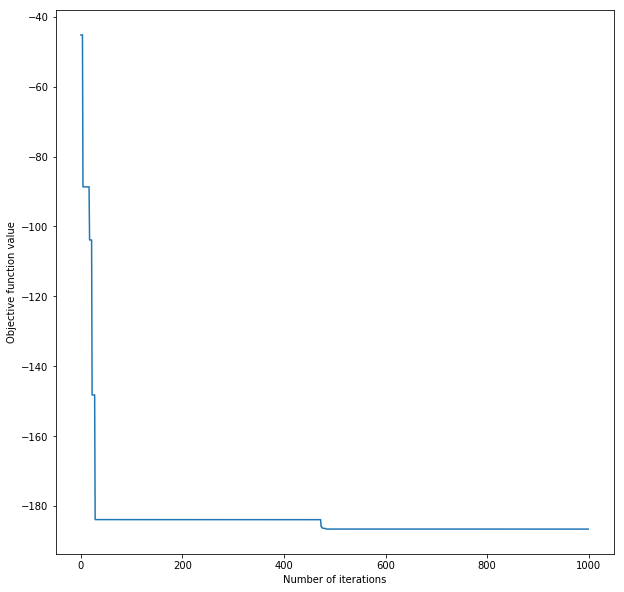

In [25]:
#plootting a graph to see convergence
plt.figure(figsize=(10,10))
plt.plot(range(len(objective_values)), list(objective_values.values()))
plt.xlabel('Number of iterations')
plt.ylabel('Objective function value')